# Testes Reconhecimento de Rostos

In [1]:
import cv2
import os
import matplotlib.pyplot as plt

os.chdir('/home/gbrlmoraes/git_reps/fiap_pbls_2024_2/PBL_fase_6')

In [2]:
img = cv2.imread('dados/yan_teste.jpeg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
img_cinza = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

In [3]:
img_rgb.shape

(1600, 1200, 3)

In [4]:
img_cinza.shape

(1600, 1200)

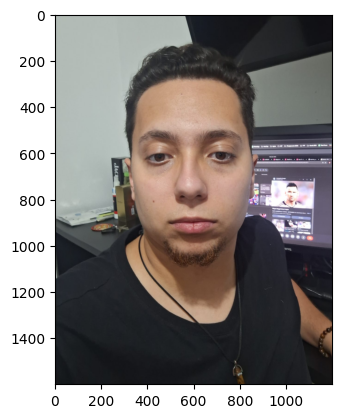

In [5]:
plt.imshow(img_rgb)

In [6]:
def draw_faces(img, faces_and_landmarks, color):
    if faces_and_landmarks is not None:
        # Para cada rosto detectado, desenha um retângulo ao redor do rosto
        for face in faces_and_landmarks[1]:
            bbox = face[:4].astype(int)  # Extrai as coordenadas da caixa delimitadora
            cv2.rectangle(img, (bbox[0], bbox[1]), (bbox[0]+bbox[2], bbox[1]+bbox[3]), color, 2)  # Desenha o retângulo
            # cv2.putText(img, f'Score: {face[14]:.2f}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)  # Adiciona o texto na imagem
    return img

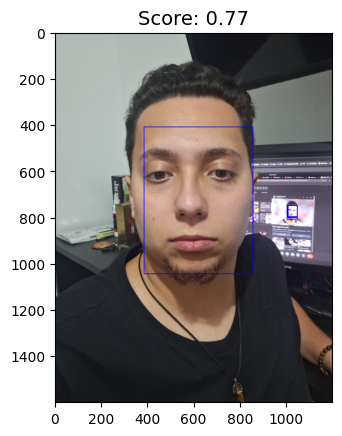

In [17]:
# Inicializa FaceDetectorYN com parâmetros
nms_threshold = 0.3
score_threshold = 0.7
yunet_shape = (img.shape[1], img.shape[0])
topk = 50000

# Inicializa o detector de rosto
detector = cv2.FaceDetectorYN.create(
    "modelos/face_detection_yunet_2023mar.onnx", 
    "", 
    yunet_shape,
    score_threshold, 
    nms_threshold, 
    topk
)

detector.setInputSize((img.shape[1], img.shape[0]))
faces_and_landmarks = detector.detect(img_rgb)

rosto = draw_faces(
    img = img_rgb,
    faces_and_landmarks=faces_and_landmarks,
    color=(0, 0, 255)
)

plt.title(f'Score: {faces_and_landmarks[1][0][14]:.2f}', fontsize = 14)
plt.imshow(rosto)

In [8]:
len(faces_and_landmarks[1])

2

In [9]:
faces_and_landmarks[:15]

(1,
 array([[1.00179871e+03, 7.49789307e+02, 4.50995636e+01, 6.04401169e+01,
         1.01487061e+03, 7.72253296e+02, 1.03371069e+03, 7.72434570e+02,
         1.02375195e+03, 7.84613342e+02, 1.01590741e+03, 7.93291443e+02,
         1.03173083e+03, 7.94944031e+02, 8.87371302e-01],
        [3.84975159e+02, 4.10577209e+02, 4.70635864e+02, 6.35888062e+02,
         4.49944733e+02, 6.06841980e+02, 7.10346558e+02, 6.10291321e+02,
         5.47301208e+02, 7.81191772e+02, 4.65418518e+02, 8.91243530e+02,
         6.84110596e+02, 8.94294800e+02, 7.69056320e-01]], dtype=float32))